Test files at: test_data/redaction_examples

1. GE Revolution CT
    * Redaction Zone: [20, 70, 20, 500]
2. Siemens Somatom Force
    * Redaction Zone: [450, 500, 400, 512]
3. Philips Brilliance 64
    * Redaction Zone: [10, 60, 200, 512]

In [1]:
%pip install --force-reinstall "git+https://github.com/kvnlng/Gantry.git"

  Cloning https://github.com/kvnlng/Gantry.git to /private/var/folders/9_/t_m12zps0xx_3k059_29tbj40000gn/T/pip-req-build-kii5htdd
  Running command git clone --filter=blob:none --quiet https://github.com/kvnlng/Gantry.git /private/var/folders/9_/t_m12zps0xx_3k059_29tbj40000gn/T/pip-req-build-kii5htdd
  Resolved https://github.com/kvnlng/Gantry.git to commit 4c90a20f2ea3382156a06edb4a1e558726044bc8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pydicom-3.0.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached numpy-2.4.1-cp314-cp314t-macosx_14_0_arm64.whl.metadata (6.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached cryptography-46.0.3-cp314-cp314t-macosx_10_9_universal2.whl.metadata (5.7 kB)
  Using cached pandas-3.0.0-cp314-cp314t-macosx_11_0_arm64.whl.metadata (79 kB)
  Using cached pyarrow-23.0.0-cp314-cp314t-macosx_12_0_arm64.whl.metadata (3.0 kB)
  U

In [2]:
%pip install pydicom matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pydicom
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [6]:
filename = "redaction_examples/Subject_PID-36479/Study_20260123_Study/Series_1_Series/0001.dcm"

ds = pydicom.dcmread(filename)

print(f"Patient's Name...: {ds.PatientName}")
print(f"Modality.........: {ds.Modality}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")

# Manufacturer
print(f"Make:  {ds.Manufacturer}")
# Model Name
print(f"Model: {ds.ManufacturerModelName}")
# Serial Number
print(f"Serial: {ds.DeviceSerialNumber}")

Patient's Name...: Rhodes^Erin
Modality.........: CT
Image size.......: 512 x 512
Make:  Siemens
Model: Somatom Force
Serial: SN-1597


(5, 512, 512)


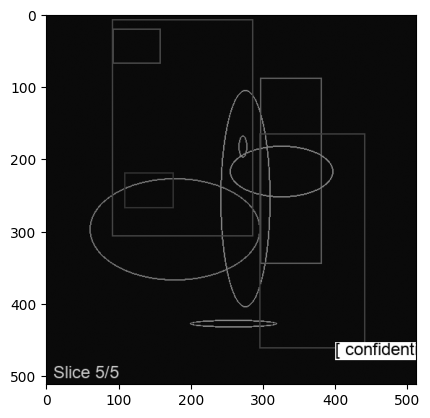

In [24]:
# Display the first frame
print(ds.pixel_array.shape)
plt.imshow(ds.pixel_array[4], cmap=cm.gray)

In [8]:
from gantry import Session
session = Session("redaction.db")

Initializing new session at redaction.db...


In [9]:
session.ingest("redaction_examples")
session.save()

Ingesting from 'redaction_examples'...


Ingesting: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 24.37it/s]

Ingestion complete. Saved session state.
Summary:
  - 6 Patients
  - 6 Studies
  - 6 Series
  - 6 Instances


In [10]:
# Print a summary of the cohort and equipment
session.examine()


Inventory Summary:
 Patients:  6
 Studies:   6
 Series:    6
 Instances: 6

Equipment Inventory:
 - GE - Revolution CT (Count: 2)
 - Philips - Brilliance 64 (Count: 2)
 - Siemens - Somatom Force (Count: 2)


In [11]:
# Create a default configuration file
session.create_config("redaction-config.yaml")

Scaffolded Unified Config to redaction-config.yaml


In [12]:
# Load the configuration (rules, tags, jitter)
session.load_config("redaction-config.yaml")

Loading configuration from redaction-config.yaml...
Configuration Loaded:
 - 6 Machine Redaction Rules
 - 29 PHI Tags
 - Date Jitter: -365 to -1 days
 - Remove Private Tags: True
Tip: Run .audit() to check PHI, or .redact_pixels() to apply redaction.


In [13]:
from pprint import pprint
config = session.configuration

pprint(config.rules)

[{'manufacturer': 'Siemens',
  'model_name': 'Somatom Force',
  'redaction_zones': [],
  'serial_number': 'SN-1798'},
 {'manufacturer': 'Siemens',
  'model_name': 'Somatom Force',
  'redaction_zones': [],
  'serial_number': 'SN-1597'},
 {'manufacturer': 'GE',
  'model_name': 'Revolution CT',
  'redaction_zones': [],
  'serial_number': 'SN-8364'},
 {'manufacturer': 'GE',
  'model_name': 'Revolution CT',
  'redaction_zones': [],
  'serial_number': 'SN-9185'},
 {'manufacturer': 'Philips',
  'model_name': 'Brilliance 64',
  'redaction_zones': [],
  'serial_number': 'SN-2361'},
 {'manufacturer': 'Philips',
  'model_name': 'Brilliance 64',
  'redaction_zones': [],
  'serial_number': 'SN-7120'}]


In [15]:
config.update_rule(serial_number="SN-8364", updates={"redaction_zones": [[20, 70, 20, 500]]})
config.update_rule(serial_number="SN-9185", updates={"redaction_zones": [[20, 70, 20, 500]]})
config.update_rule(serial_number="SN-1798", updates={"redaction_zones": [[450, 500, 400, 512]]})
config.update_rule(serial_number="SN-1597", updates={"redaction_zones": [[450, 500, 400, 512]]})
config.update_rule(serial_number="SN-2361", updates={"redaction_zones": [[10, 60, 200, 512]]})
config.update_rule(serial_number="SN-7120", updates={"redaction_zones": [[10, 60, 200, 512]]})

In [16]:
pprint(config.rules)

[{'manufacturer': 'Siemens',
  'model_name': 'Somatom Force',
  'redaction_zones': [[450, 500, 400, 512]],
  'serial_number': 'SN-1798'},
 {'manufacturer': 'Siemens',
  'model_name': 'Somatom Force',
  'redaction_zones': [[450, 500, 400, 512]],
  'serial_number': 'SN-1597'},
 {'manufacturer': 'GE',
  'model_name': 'Revolution CT',
  'redaction_zones': [[20, 70, 20, 500]],
  'serial_number': 'SN-8364'},
 {'manufacturer': 'GE',
  'model_name': 'Revolution CT',
  'redaction_zones': [[20, 70, 20, 500]],
  'serial_number': 'SN-9185'},
 {'manufacturer': 'Philips',
  'model_name': 'Brilliance 64',
  'redaction_zones': [[10, 60, 200, 512]],
  'serial_number': 'SN-2361'},
 {'manufacturer': 'Philips',
  'model_name': 'Brilliance 64',
  'redaction_zones': [[10, 60, 200, 512]],
  'serial_number': 'SN-7120'}]


In [17]:
session.redact()

Queued 6 redaction tasks across 6 rules.
Executing using 7 workers (Process Isolation)...


Redacting Pixels: 100%|██████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 118.16it/s]

DEBUG: Updated loader for 1.2.840.999.88905.1.1 -> 230975
DEBUG: Instance 1.2.840.999.88905.1.1 updated in memory.
DEBUG: Updated loader for 1.2.840.999.35233.1.1 -> 261149
DEBUG: Instance 1.2.840.999.35233.1.1 updated in memory.
DEBUG: Updated loader for 1.2.840.999.34012.1.1 -> 291323
DEBUG: Instance 1.2.840.999.34012.1.1 updated in memory.
DEBUG: Updated loader for 1.2.840.999.31267.1.1 -> 320558
DEBUG: Instance 1.2.840.999.31267.1.1 updated in memory.
DEBUG: Updated loader for 1.2.840.999.98117.1.1 -> 380054
DEBUG: Instance 1.2.840.999.98117.1.1 updated in memory.
DEBUG: Updated loader for 1.2.840.999.47726.1.1 -> 349793
DEBUG: Instance 1.2.840.999.47726.1.1 updated in memory.
Execution Complete. Remember to call .save() to persist.
Execution Complete. Session saved.


In [18]:
session.export("redacted_dicoms", safe=False, compression="j2k")

Preparing export plan...
Saving pending changes to free memory...


Releasing Memory: 100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 63230.71img/s]

Memory Cleanup: Released 6 images from RAM.
Exporting 6 images from 6 patients...



Exporting: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.61it/s]

Done.


In [19]:
redacted_filename = "redacted_dicoms/Subject_PID-36479/Study_2026-01-23_Study_35233/Series_1_CT_Series_233.1/1.2.826.0.1.3680043.8.498.42456815010659152373933036774970061208.dcm"

redacted_ds = pydicom.dcmread(redacted_filename)

print(f"Patient's Name...: {redacted_ds.PatientName}")
print(f"Modality.........: {redacted_ds.Modality}")
print(f"Image size.......: {redacted_ds.Rows} x {redacted_ds.Columns}")

# Manufacturer (e.g., "GE Medical Systems", "SIEMENS")
print(f"Make:  {redacted_ds.Manufacturer}")
# Model Name (e.g., "Revolution CT", "Somatom Force")
print(f"Model: {redacted_ds.ManufacturerModelName}")
# Serial Number
print(f"Serial: {redacted_ds.DeviceSerialNumber}")

Patient's Name...: Rhodes^Erin
Modality.........: CT
Image size.......: 512 x 512
Make:  Siemens
Model: Somatom Force
Serial: SN-1597


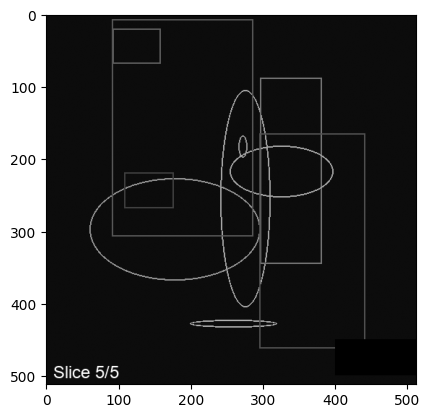

In [25]:
# Display the first frame
plt.imshow(redacted_ds.pixel_array[4], cmap=cm.gray)